# Titanic Survival Predictions

I am a new to data science and machine learning, and will be attempting to work my way through the Titanic: Machine Learning from Disaster dataset. Please consider upvoting if this is useful to you! :)

## Contents:

1) Import Necessary Libraries

2) Read In and Explore the Data

3) Data Analysis

4) Data Visualization

5) Cleaning Data

6) Choosing the Best Model

7) Creating Submission File


## 1) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


## 2) Read and Explore the Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# preview the data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.info()
print("****************************")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [6]:
# What is the distribution of numerical feature values?

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#What is the distribution of categorical features?

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Culumovic, Mr. Jeso",male,1601,B96 B98,S
freq,1,577,7,4,644


## Some Observations:

### Numerical Features:
Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

### Categorical Features:
Survived, Sex, Embarked, Pclass

### Alphanumeric Features:
Ticket, Cabin



## 3) Data Analysis


In [8]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [9]:
#check for any null values
print(pd.isnull(train_df).sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


### We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Some Predictions:

Sex: Females are more likely to survive.

Age: Young children are more likely to survive.

Pclass: People of higher socioeconomic class are more likely to survive.

## 4) Data Visualization



### Sex Feature

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

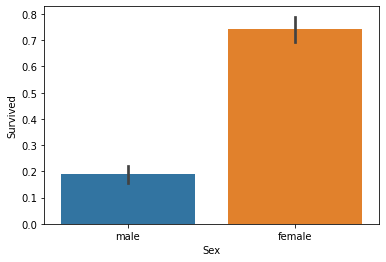

In [14]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_df)

females have a much higher chance of survival than males. The Sex feature is essential in our predictions




### Pclass Feature

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

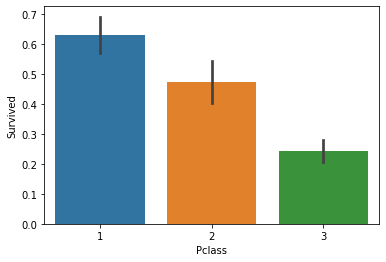

In [15]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train_df)

As predicted, people with higher socioeconomic class had a higher rate of survival.




### SibSp Feature



<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

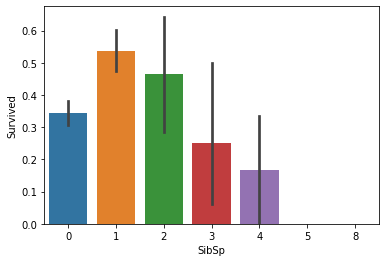

In [16]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train_df)


people with no siblings or spouses were less to likely to survive than those with one or two, but more than 3 sibsp  were less likely to survive.


### Parch Feature

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

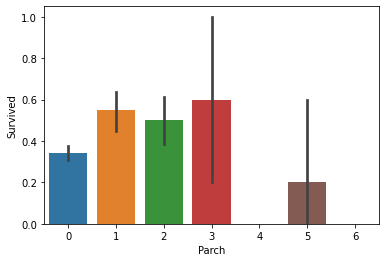

In [17]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train_df)

People with less than four parents or children aboard are more likely to survive than those with four or more, people traveling alone are less likely to survive than those with 1-3 parents or children.

### Age Feature 
the credit to 
( Manav Sehgal )

In [18]:
combine = [train_df, test_df]

In [19]:
#change sex from Categorical to Numerical 
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [20]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations

In [21]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.2500,NaN,S
1,1,1,1,38,1,0,71.2833,C85,C
2,1,3,1,26,0,0,7.9250,NaN,S
3,1,1,1,35,1,0,53.1000,C123,S
4,0,3,0,35,0,0,8.0500,NaN,S


In [22]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBand
0,0,3,0,1,1,0,7.2500,NaN,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C85,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,NaN,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,C123,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,NaN,S,"(32.0, 48.0]"


In [24]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,1,1,0,7.2500,NaN,S
1,1,1,1,2,1,0,71.2833,C85,C
2,1,3,1,1,0,0,7.9250,NaN,S
3,1,1,1,2,1,0,53.1000,C123,S
4,0,3,0,2,0,0,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Survived'>

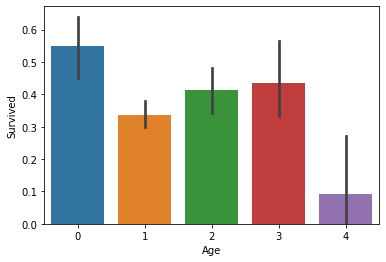

In [25]:
#draw a bar plot for Age vs. survival
sns.barplot(x="Age", y="Survived", data=train_df)

children ( less than 16 years old ) are more likely to survive than any other age group.

## 5) Cleaning Data
Time to clean our data

### Cabin

In [26]:
# Cabin

# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [27]:
#Embarked

#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [28]:
#replacing the missing values in the Embarked feature with S
train_df = train_df.fillna({"Embarked": "S"})
test_df = test_df.fillna({"Embarked": "S"})


In [29]:
combine = [train_df, test_df]

In [30]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,1
1,1,1,1,2,1,0,71.2833,2
2,1,3,1,1,0,0,7.9250,1
3,1,1,1,2,1,0,53.1000,1
4,0,3,0,2,0,0,8.0500,1


### Family

In [31]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
# drop Parch & SibSp & FamilySize
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,1,0
1,1,1,1,2,71.2833,2,0
2,1,3,1,1,7.9250,1,1
3,1,1,1,2,53.1000,1,0
4,0,3,0,2,8.0500,1,1


### Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset

In [34]:
#fill in missing Fare value in test set based on median fare for that Pclass 
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,7.8292,3,1
1,893,3,1,2,7.0000,1,0
2,894,2,0,3,9.6875,3,1
3,895,3,0,1,8.6625,1,1
4,896,3,1,1,12.2875,1,0


In [35]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [36]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,1,0
1,1,1,1,2,3,2,0
2,1,3,1,1,1,1,1
3,1,1,1,2,3,1,0
4,0,3,0,2,1,1,1
5,0,3,0,1,1,3,1
6,0,1,0,3,3,1,1
7,0,3,0,0,2,1,0
8,1,3,1,1,1,1,0
9,1,2,1,0,2,2,0


In [37]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,0,3,1
1,893,3,1,2,0,1,0
2,894,2,0,3,1,3,1
3,895,3,0,1,1,1,1
4,896,3,1,1,1,1,0
5,897,3,0,0,1,1,1
6,898,3,1,1,0,3,1
7,899,2,0,1,2,1,0
8,900,3,1,1,0,2,1
9,901,3,0,1,2,1,0


### 6) Choosing the Best Model

#### Splitting the Training Data
We will use part of our training data (30% in this case) to test the accuracy of our different models.

In [38]:
from sklearn.model_selection import train_test_split

predictors = train_df.drop(['Survived'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, random_state = 33, shuffle =True)


In [39]:
print('X_train shape is ' , x_train.shape)
print('x_val shape is ' , x_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (623, 6)
x_val shape is  (268, 6)
y_train shape is  (623,)
y_val shape is  (268,)


In [40]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.22


In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.97


In [42]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.46


In [43]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

81.72


In [44]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

65.3


In [45]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

83.96


In [46]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.96


In [47]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.72


In [48]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

66.04


In [49]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.33


In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.33
3,Random Forest,83.96
7,Decision Tree,83.96
0,Support Vector Machines,82.46
1,KNN,81.72
6,Linear SVC,81.72
2,Logistic Regression,80.97
4,Naive Bayes,80.22
8,Stochastic Gradient Descent,66.04
5,Perceptron,65.30


I decided to use the Gradient Boosting Classifier model for the testing data.

In [51]:
#set ids as PassengerId and predict survival 
IDs = test_df['PassengerId']
predictions = gbk.predict(test_df.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : IDs, 'Survived': predictions })
output.to_csv('submission.csv', index=False)